**Created by Berkay Alan**

**Classification with Logistic Regression**

**5 August 2021**

**For more Tutorial:** https://github.com/berkayalan

## Content


**Classification with Logistic Regression**

- Logistic Regression (Theory - Model- Tuning and Validation)

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**Logistic Regression by Statquest**](https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer)

- [**The Ultimate Guide to Regression & Classification**](https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification)

- [**Logistic Regression for Machine Learning**](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)

- [**Logistic Regression by Stanford University**](https://web.stanford.edu/class/stats202/notes/Classification/Logistic-regression.html)

- [**What is a Confusion Matrix in Machine Learning?**](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

## Importing Libraries

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import time
from skompiler import skompile

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [29]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Logistic Regression

### Theory

  Logistic Regression is so similar to linear Regression because both the models use linear equations for predictions. But the main difference is that Logistic regression is used to handle the classification problems wheras Linear Regression is used to handle regression problems. For example, we can try to predict the price of a house by using linear regression because we are predicting a price, a continuous number. But if we want to understand if an email is spam or not, we need to use Logistic Regression because we try to solve a binary classification problem (problem with two class values, *Spam* or *Not Spam* in this example).  

**Logistic(Sigmoid - σ) Function: The core of the method**

  The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.
  
  The formula of sigmoid function as below:
  
  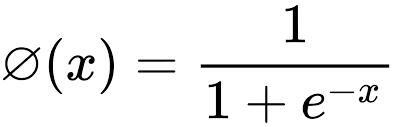
  
  Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.oreilly.com%2Flibrary%2Fview%2Fhands-on-automated-machine%2F9781788629898%2Faa703b68-f6df-40fd-b196-cdbef2b0c7db.xhtml&psig=AOvVaw3I4aV7wKnwIREXWNOOK5Ze&ust=1627894816803000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIjR1v66j_ICFQAAAAAdAAAAABAD)

Here e is base of the natural logarithms (Euler’s number) and value is the actual numerical value that we want to transform. 

  Input values (x) are combined linearly using weights or coefficient values to predict an output value y that equals to σ(x).

The function seems as below:

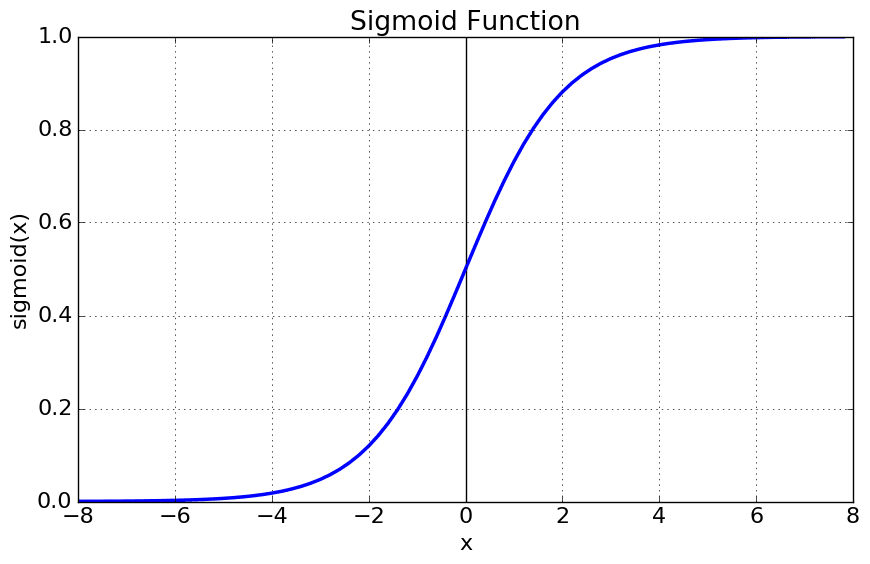

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fdataaspirant.com%2F5-sigmoid-function%2F&psig=AOvVaw3I4aV7wKnwIREXWNOOK5Ze&ust=1627894816803000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIjR1v66j_ICFQAAAAAdAAAAABAV)

**Logistic Regression Predicts Probabilities**

Logistic regression models the probability of the default class (e.g. the first class).

For example, if we are modeling people’s gender as male or female from their weight, then the first class could be female and the logistic regression model could be written as the probability of female given a person’s weight, or more formally:

*P(gender=female|weight)*

We need to be aware of that the probability prediction must be transformed into a binary values (0 or 1) in order to actually make a probability prediction. 

Logistic regression is a linear method, but the predictions are transformed using the *logistic(sigmoid) function*. 



**Maximum-likelihood Estimation**

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from our training data. This can be done using maximum-likelihood estimation.

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of our data. 

The best coefficients would result in a model that would predict a value very close to 1 (e.g. female) for the default class and a value very close to 0 (e.g. male) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data.

### Model

For a real world example, we will work with **Pima Indians Diabetes Database** data set by UCI Machine Learning.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [181]:
df = pd.read_csv("diabetes.csv")

In [182]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [183]:
df.shape

(768, 9)

In [184]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [185]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

In [186]:
X.shape

(768, 8)

In [187]:
y.shape

(768,)

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [188]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [189]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X_train,y_train)

In [190]:
logistic_regression

LogisticRegression(random_state=0)

In [195]:
logistic_regression.intercept_

array([-8.61450369])

In [196]:
logistic_regression.coef_

array([[ 1.05313999e-01,  3.25784484e-02, -8.64549468e-03,
        -6.94598417e-03, -7.81139652e-04,  1.04629844e-01,
         1.30792298e+00,  7.21806678e-03]])

**Most Important Parameters of Logistic Regression**

- Penalty: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied. default=’l2’

- C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- Class_weight: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- random_state: Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.

We will also create a model with **statsmodel** to get more information.

In [193]:
lr_statsmodel = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.609651
         Iterations 5


In [194]:
lr_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  600
Model:                          Logit   Df Residuals:                      592
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Aug 2021   Pseudo R-squ.:                 0.05533
Time:                        22:53:06   Log-Likelihood:                -365.79
converged:                       True   LL-Null:                       -387.22
Covariance Type:            nonrobust   LLR p-value:                 3.567e-07
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1243      0.032      3.848      0.000       0.061       0.188
Glucose                      0.0112      0.003      3.750      0.000       0.005       0.017
BloodPressure               -0.0291      0.005     -5.566      0.000      -0.039      -0.019
SkinThickness               -0.0042      0.007     -0.611      0.541      -0.017       0.009
Insulin                      0.0012      0.001      1.349      0.177      -0.001       0.003
BMI                          0.0068      0.012      0.567      0.571      -0.017       0.030
DiabetesPedigreeFunction     0.3069      0.267      1.148      0.251      -0.217       0.831
Age                         -0.0213      0.010     -2.218      0.027      -0.040      -0.002
============================================================================================
"""

### Prediction

In [197]:
logistic_regression

LogisticRegression(random_state=0)

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [198]:
y_pred = logistic_regression.predict(X_test)

In [199]:
cm = confusion_matrix(y_test,y_pred)

In [200]:
cm

array([[96, 12],
       [26, 34]])

- **true positive**: for correctly predicted event values. -96
- **false positive**: for incorrectly predicted event values. - 34
- **true negative**: for correctly predicted no-event values. -12
- **false negative**: for incorrectly predicted no-event values.-26


In [201]:
print("Our Accuracy is: ", (96+34)/(96+12+26+34))

Our Accuracy is:  0.7738095238095238


In [204]:
accuracy_score(y_test,y_pred)

0.7738095238095238

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       108
           1       0.74      0.57      0.64        60

    accuracy                           0.77       168
   macro avg       0.76      0.73      0.74       168
weighted avg       0.77      0.77      0.77       168



### Model Tuning & Validation

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [162]:
accuracies= cross_val_score(estimator=logistic_regression,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 77.22 %
Standart Deviation of Accuracies: 15.61 %


In [207]:
logistic_regression.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

As you can see *predict()* function gives us directly classes. If we want to get probabilites of each classes, we can use **predict_proba()** function. We can also give manual treshold to classify.

In [221]:
results =pd.DataFrame(logistic_regression.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]

In [222]:
results

,Possibility of 0,Possibility of 1,Class
0,0.913063,0.086937,0
1,0.872667,0.127333,0
2,0.891218,0.108782,0
3,0.266377,0.733623,1
4,0.218023,0.781977,1
5,0.654949,0.345051,0
6,0.101386,0.898614,1
7,0.967783,0.032217,0
8,0.491178,0.508822,1
9,0.942883,0.057117,0


We will also see roc auc score.

In [231]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X,y)

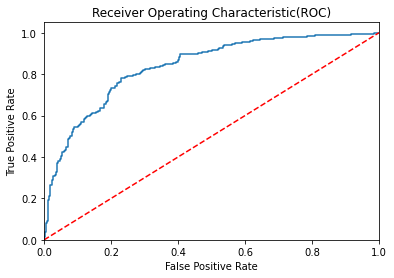

In [232]:
logistic_regression_roc = roc_auc_score(y,logistic_regression.predict(X))

fp,tp,trshld = roc_curve(y,logistic_regression.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %logistic_regression_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()